In [103]:
%matplotlib inline
import math
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn import tree
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn import neighbors
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC

In [104]:
import itertools    
def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Oranges):
        import itertools
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [105]:
from sklearn.model_selection import learning_curve

In [106]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [107]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [108]:
df_train = pd.read_csv("abalone-data.csv")
colum_names = ['sex', 'length', 'diameter', 'height', 'whole_weght', 'Shucked weight', 'Viscera_weight', 'Shell_weight', 'rings']


In [109]:
df_train.columns = colum_names

In [110]:
df_train.head()

,sex,length,diameter,height,whole_weght,Shucked weight,Viscera_weight,Shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [111]:
#scarto gli infanti
data = df_train[df_train.sex != 'I']
data.head()

,sex,length,diameter,height,whole_weght,Shucked weight,Viscera_weight,Shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


In [112]:
#rendo sex un valore binario
#df['rings_disc'] = pd.cut(df['rings'], bins=[0,9,30], right=False, labels=['pochi','tanti'])
sex = data['sex'].unique()
sex_mapping = dict(zip(sex, range(0,2)))
print(sex_mapping)
data['sex']=data['sex'].map(sex_mapping)
data.head()

{'M': 0, 'F': 1}


C:\Users\Martina\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,sex,length,diameter,height,whole_weght,Shucked weight,Viscera_weight,Shell_weight,rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
6,1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


In [113]:
#binarizzo la colonna rins
data['rings_disc'] = pd.cut(data['rings'], bins=[0, 10, 30], right=True, labels = [0, 1] ) #0 sono quelli con pochi 1 quelli con tanti
data.head()

C:\Users\Martina\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,sex,length,diameter,height,whole_weght,Shucked weight,Viscera_weight,Shell_weight,rings,rings_disc
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
6,1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,1


In [114]:
print(data.rings_disc.value_counts(sort=True)*100/len(data)) #sono più i few che i many

0    54.426808
1    45.573192
Name: rings_disc, dtype: float64


In [115]:
#elimino la colonna rings
df = data.drop(['rings'], axis=1)
df.head()

,sex,length,diameter,height,whole_weght,Shucked weight,Viscera_weight,Shell_weight,rings_disc
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0
6,1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,1


In [116]:
#Convert the DataFrame to a numpy array:
balanced = df.values

In [117]:
# Training data features, skip the last column 'ring_disc'
train_features = balanced[:, 0:7]

# 'ring_disc' column values
train_target = balanced[:,8].astype(int)

In [118]:
x_train, x_test, y_train, y_test = train_test_split(train_features, train_target, test_size = 0.20, random_state = 0)

In [119]:
#FORRESTCLASSIFIER
from scipy.stats import randint as sp_randint

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [120]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]}


In [121]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 19.9min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [122]:
report(rf_random.cv_results_, 3)

Model with rank: 1
Mean validation score: 0.717 (std: 0.015)
Parameters: {'bootstrap': True, 'min_samples_leaf': 4, 'n_estimators': 400, 'max_features': 'sqrt', 'min_samples_split': 10, 'max_depth': 90}

Model with rank: 2
Mean validation score: 0.716 (std: 0.015)
Parameters: {'bootstrap': True, 'min_samples_leaf': 4, 'n_estimators': 200, 'max_features': 'auto', 'min_samples_split': 5, 'max_depth': 10}

Model with rank: 3
Mean validation score: 0.716 (std: 0.014)
Parameters: {'bootstrap': True, 'min_samples_leaf': 4, 'n_estimators': 400, 'max_features': 'auto', 'min_samples_split': 10, 'max_depth': 70}



In [151]:
rfc_bal = RandomForestClassifier(n_estimators = 400,
                             class_weight=None, 
                             criterion='gini', 
                             max_depth=90,
                             max_features='sqrt', 
                             min_samples_leaf=4, 
                             min_samples_split=10,
                             bootstrap=True)

In [154]:
scores = cross_validation.cross_val_score(rfc_bal, x_train, y_train, cv=5)
print ('Accuracy RFC Balanced Data: %0.5f (+/- %0.5f)' % (scores.mean(), scores.std() * 2))

Accuracy RFC Balanced Data: 0.71297 (+/- 0.03687)


('Accuracy: ', 0.75132275132275128)
Confusion matrix, without normalization
[[240  59]
 [ 82 186]]


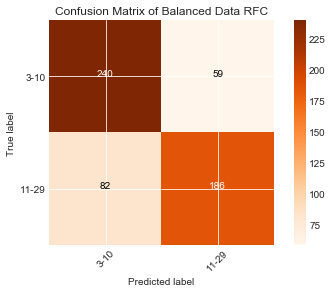

In [155]:
#CLASSI BILANCIATE
rfc_bal.fit(x_train,y_train)
predicted_balanced = rfc_bal.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, predicted_balanced))
classes= ['3-10', '11-29']
cmbal = confusion_matrix(y_test, predicted_balanced)
plot_confusion_matrix(cmbal, classes=classes, title="Confusion Matrix of Balanced Data RFC")

In [156]:
lf = neighbors.KNeighborsClassifier(10, weights='distance')
scores = cross_validation.cross_val_score(lf, x_train, y_train, cv=10)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.71 (+/- 0.05)


In [158]:
data['rings_disc'] = pd.cut(data['rings'], bins=[0, 14, 30], right=True, labels = [0, 1])

C:\Users\Martina\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [159]:
df1 = data.drop(['rings'], axis=1)
print(df1.rings_disc.value_counts(sort=True)*100/len(df1)) #sono più i few che i many
df1.head()


0    88.359788
1    11.640212
Name: rings_disc, dtype: float64


,sex,length,diameter,height,whole_weght,Shucked weight,Viscera_weight,Shell_weight,rings_disc
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0
6,1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,1


In [160]:
#Convert the DataFrame to a numpy array:
train_data_imbalanced = df1.values

In [131]:
# Training data features, skip the last column 'ring_disc'
train_features_imb = train_data_imbalanced[:, 0:7]

# 'ring_disc' column values
train_target_imb = train_data_imbalanced[:,8].astype(int)

In [132]:
#OVERSAMPLING SULLA CLASSE DI MINORANZA (15-29)
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
print(train_features_imb[0])
print(train_target_imb[0])

[0L 0.455 0.365 0.095 0.514 0.2245 0.10099999999999999]
1


In [133]:
sm = SMOTE(ratio = {1:1800})
trainfSMO, traintSMO = sm.fit_sample(train_features_imb, train_target_imb)

In [134]:
print(len(trainfSMO))
print(len(traintSMO))

4305
4305


In [135]:
x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(trainfSMO, traintSMO, test_size = 0.20, random_state = 0)

In [136]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_os, y_train_os)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 25.2min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [137]:
report(rf_random.cv_results_, 3)

Model with rank: 1
Mean validation score: 0.916 (std: 0.011)
Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 400, 'max_features': 'sqrt', 'min_samples_split': 2, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.914 (std: 0.007)
Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 1800, 'max_features': 'auto', 'min_samples_split': 2, 'max_depth': 20}

Model with rank: 3
Mean validation score: 0.913 (std: 0.009)
Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 1400, 'max_features': 'auto', 'min_samples_split': 2, 'max_depth': 40}



In [138]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [161]:
rfc_SMO = RandomForestClassifier(n_estimators = 400,
                             class_weight=None, 
                             criterion='gini', 
                             max_depth=None,
                             max_features='sqrt', 
                             min_samples_leaf=1, 
                             min_samples_split=2,
                             bootstrap=False)

In [162]:
scores_os = cross_validation.cross_val_score(rfc_SMO, x_train_os, y_train_os, cv=5)
print ('Accuracy RFC Oversampled: %0.5f (+/- %0.5f)' % (scores_os.mean(), scores_os.std() * 2))

Accuracy RFC Oversampled: 0.91318 (+/- 0.02222)


In [163]:
lf = neighbors.KNeighborsClassifier(10, weights='distance')
scores = cross_validation.cross_val_score(lf, x_train_os, y_train_os, cv=10)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.89 (+/- 0.04)


('Accuracy: ', 0.92102206736353076)
Confusion matrix, without normalization
[[464  43]
 [ 25 329]]


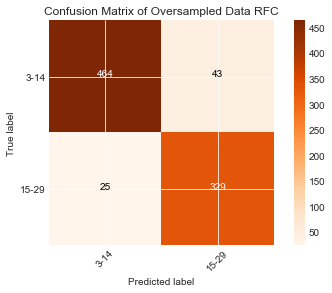

In [164]:
#CLASSI OVERSAMPLED
rfc_SMO.fit(x_train_os,y_train_os)
predicted_oversampled = rfc_SMO.predict(x_test_os)
print("Accuracy: ", accuracy_score(y_test_os, predicted_oversampled))
classes= ['3-14','15-29']
cmSMO = confusion_matrix(y_test_os, predicted_oversampled)
plot_confusion_matrix(cmSMO, classes=classes, title="Confusion Matrix of Oversampled Data RFC")

In [143]:
x_train_imb, x_test_imb, y_train_imb, y_test_imb = train_test_split(train_features_imb, train_target_imb, test_size = 0.20, random_state = 0)

In [144]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_imb, y_train_imb)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 19.0min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [145]:
report(rf_random.cv_results_, 3)

Model with rank: 1
Mean validation score: 0.894 (std: 0.008)
Parameters: {'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 400, 'max_features': 'sqrt', 'min_samples_split': 5, 'max_depth': 100}

Model with rank: 2
Mean validation score: 0.893 (std: 0.009)
Parameters: {'bootstrap': True, 'min_samples_leaf': 2, 'n_estimators': 1000, 'max_features': 'sqrt', 'min_samples_split': 2, 'max_depth': 60}

Model with rank: 2
Mean validation score: 0.893 (std: 0.008)
Parameters: {'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 1000, 'max_features': 'sqrt', 'min_samples_split': 2, 'max_depth': 110}

Model with rank: 2
Mean validation score: 0.893 (std: 0.009)
Parameters: {'bootstrap': True, 'min_samples_leaf': 2, 'n_estimators': 2000, 'max_features': 'auto', 'min_samples_split': 2, 'max_depth': 90}

Model with rank: 2
Mean validation score: 0.893 (std: 0.007)
Parameters: {'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 200, 'max_features': 'sqrt', 'min_samples_split': 2

In [146]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [165]:
rfc_imb = RandomForestClassifier(n_estimators = 400,
                             class_weight=None, 
                             criterion='gini', 
                             max_depth=100,
                             max_features='sqrt', 
                             min_samples_leaf=1, 
                             min_samples_split=5,
                             bootstrap=True)

In [166]:
scores_imb = cross_validation.cross_val_score(rfc_imb, x_train_imb, y_train_imb, cv=5)
print ('Accuracy RFC Unbalanced: %0.5f (+/- %0.5f)' % (scores_imb.mean(), scores_imb.std() * 2))

Accuracy RFC Unbalanced: 0.89066 (+/- 0.01838)


('Accuracy: ', 0.87301587301587302)
Confusion matrix, without normalization
[[486   5]
 [ 67   9]]


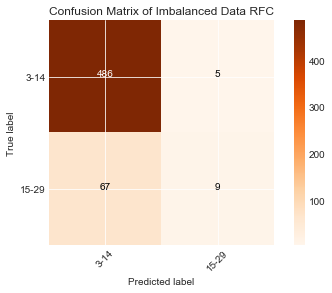

In [167]:
#CLASSI UNBALANCED
rfc_imb.fit(x_train_imb,y_train_imb)
predicted_imbalanced = rfc_imb.predict(x_test_imb)
print("Accuracy: ", accuracy_score(y_test_imb, predicted_imbalanced))
classes= ['3-14', '15-29']
cmimb = confusion_matrix(y_test_imb, predicted_imbalanced)
plot_confusion_matrix(cmimb, classes=classes, title="Confusion Matrix of Imbalanced Data RFC")

ROC CURVE

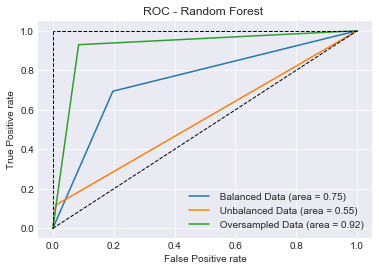

In [168]:
#CURVE A CONFRONTO
from sklearn.metrics import roc_curve, auc
import seaborn as sns
fpr_test, tpr_test, _= roc_curve(y_test, predicted_balanced)
roc_auc = auc(fpr_test, tpr_test)


fpr_test_imb, tpr_test_imb, _= roc_curve(y_test_imb, predicted_imbalanced)
roc_auc_imb = auc(fpr_test_imb, tpr_test_imb)


fpr_test_os, tpr_test_os, _= roc_curve(y_test_os, predicted_oversampled)
roc_auc_os = auc(fpr_test_os, tpr_test_os)



sns.set_style("darkgrid")
plt.plot(fpr_test,tpr_test, label=' Balanced Data (area = %0.2f)' % roc_auc)
plt.plot(fpr_test_imb,tpr_test_imb, label=' Unbalanced Data (area = %0.2f)' % roc_auc_imb)
plt.plot(fpr_test_os,tpr_test_os, label=' Oversampled Data (area = %0.2f)' % roc_auc_os)

plt.title("ROC - Random Forest ")

plt.legend(loc="lower right")
plt.plot([0,1], [0,1], 'k--', lw = 1)
plt.plot([0,0], [1,0], 'k--', lw = 1, color = 'black')
plt.plot([1,0], [1,1], 'k--', lw = 1, color = 'black')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate');
plt.show()